## Better Products


In [1]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt
import matplotlib.pyplot as plt

In [2]:
#Create LP model object
mymodel = glp.Solver('BetterProducts',glp.Solver.GLOP_LINEAR_PROGRAMMING)

In [3]:
inf = mymodel.infinity()

variables = {'Prodcut1': (0,inf,30),    # (lower bound, upper bound, objective coefficient)
             'Product2': (0,inf,50),
             'Product3': (0,inf,20)}

constraints = {'Machine1': (0,100,[.5,2,.75]),    # (lower bound, upper bound, coefficient list)
               'Machine2': (0,100,[1,1,.5]),
               'MinProduct1': (-inf,0, [.5,-.50,-.50 ]),
               'MaxProduct3': (0,inf, [-.20,-.20,.80 ]),
               'LaborHours': (0,100, [1.5,1.5,1])}

In [4]:
mymodel.Objective().SetMaximization()
for v in variables:
    #print(v)
    #print(variables[v])
    (lb,ub,c) = variables[v]
    var = mymodel.NumVar(lb,ub,v)
    mymodel.Objective().SetCoefficient(var,c)

In [5]:
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    #print(list(zip(mymodel.variables(),coeff_lst)))
    constr = mymodel.Constraint(lb,ub,c)
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)

In [6]:
lpt.print_model(mymodel)

Variables:
Prodcut1, Product2, Product3 

maximize: 30.0*Prodcut1 + 50.0*Product2 + 20.0*Product3 

Subject To:
Machine1: 0.5*Prodcut1 + 2.0*Product2 + 0.75*Product3 >= 0.0
Machine1: 0.5*Prodcut1 + 2.0*Product2 + 0.75*Product3 <= 100.0
Machine2: 1.0*Prodcut1 + 1.0*Product2 + 0.5*Product3 >= 0.0
Machine2: 1.0*Prodcut1 + 1.0*Product2 + 0.5*Product3 <= 100.0
MinProduct1: 0.5*Prodcut1 - 0.5*Product2 - 0.5*Product3 <= 0.0
MaxProduct3: - 0.2*Prodcut1 - 0.2*Product2 + 0.8*Product3 >= 0.0
LaborHours: 1.5*Prodcut1 + 1.5*Product2 + 1.0*Product3 >= 0.0
LaborHours: 1.5*Prodcut1 + 1.5*Product2 + 1.0*Product3 <= 100.0

Bounds:
Prodcut1 >= 0.0
Product2 >= 0.0
Product3 >= 0.0


In [7]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status)
print('Optimal Value = %.2f' % mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name(),v.solution_value()))
    

Solution Status = 0
Optimal Value = 2809.52
Prodcut1 = 16.67
Product2 = 40.48
Product3 = 14.29


In [8]:
# display variable information
print('Variable    LB   Value    UB   Reduced Cost')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f  %5.2f' % (v.name(),v.lb(),v.solution_value(),v.ub(),v.reduced_cost()))

Variable    LB   Value    UB   Reduced Cost
Prodcut1    0.0   16.7    inf   0.00
Product2    0.0   40.5    inf  -0.00
Product3    0.0   14.3    inf   0.00


In [9]:
#display constraint information
print('Constraint    LB    Value  UB     Dual')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f  %5.2f' % (c.name(),c.lb(),lhs,c.ub(),c.dual_value()))

Constraint    LB    Value  UB     Dual
  Machine1    0.0  100.0  100.0  13.33
  Machine2    0.0   64.3  100.0  -0.00
MinProduct1   -inf  -19.0    0.0  -0.00
MaxProduct3    0.0    0.0    inf  -5.95
LaborHours    0.0  100.0  100.0  14.76


100 2809.523809523809
101 2824.2857142857147
102 2839.0476190476193
103 2853.809523809524
104 2868.5714285714284
105 2883.3333333333335
106 2898.095238095238
107 2912.857142857143
108 2927.6190476190477
109 2942.3809523809527
110 2957.1428571428573
111 2971.9047619047615
112 2986.666666666667
113 3001.4285714285716
114 3016.190476190476
115 3030.9523809523816
116 3045.7142857142862
117 3060.47619047619
118 3075.2380952380954
119 3090.0
120 3104.7619047619046
121 3119.5238095238096
122 3134.2857142857147
123 3149.047619047619
124 3163.809523809524
125 3178.5714285714284
126 3193.333333333334
127 3208.0952380952385
128 3222.857142857143
129 3237.6190476190477
130 3252.3809523809527
131 3267.1428571428573
132 3281.904761904762
133 3296.666666666667
134 3311.4285714285716
135 3326.1904761904766
136 3340.952380952381
137 3355.7142857142862
138 3370.476190476191
139 3385.2380952380954


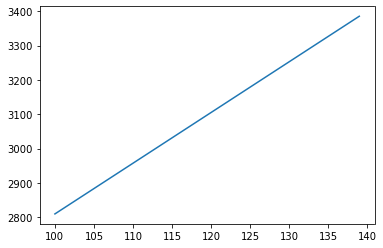

In [10]:
# Opt Param analysis for labor capacity
param_lst = list(range(100,140))
optval_lst=list()
constr = mymodel.constraints()[4]
for b in param_lst:
    constr.SetUb(b)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
    print(b,mymodel.Objective().Value())
constr.SetUb(100)
plt.plot(param_lst,optval_lst)

In [ ]:
#The Optimal solution, profit, increasing as the total hours increase from 100 to 140.

In [62]:
#If the labor capacity increased to 120 hours, I would use them as it increased the profit to $5994

## Frandec Company

In [11]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt
import matplotlib.pyplot as plt

In [12]:
#Create LP model object
mymodel = glp.Solver('Frandec',glp.Solver.GLOP_LINEAR_PROGRAMMING)

In [13]:
inf = mymodel.infinity()

variables = {'FrameManufacture': (0,inf,38.00),    # (lower bound, upper bound, objective coefficient)
             'SupportManufacture': (0,inf,11.50),
             'StrapManufacture': (0,inf,6.50),
             'FramePurchase': (0,inf,51.00),
             'SupportPurchase': (0,inf,15.00),
             'StrapManufacture': (0,inf,7.50)}

constraints = {'Cutting': (0,21000,[3.5 ,1.3 ,.80,0,0,0]),    # (lower bound, upper bound, coefficient list)
               'Milling': (0,25200,[2.2 , 1.7 , 0,0,0,0]),
               'Shaping': (0,40800,[3.1, 2.6 , 1.7,0,0,0]),
               'CuttingCapacity': (5000,inf, [1, 0, 0,1,0,0]),
               'MillingCapacity': (10000,inf, [0,1,0,0,1,0]),
               'ShapingCapacity': (5000,inf, [0,0,1,0,0,1])}
               
               


In [14]:
mymodel.Objective().SetMinimization()
for v in variables:
    #print(v)
    #print(variables[v])
    (lb,ub,c) = variables[v]
    var = mymodel.NumVar(lb,ub,v)
    mymodel.Objective().SetCoefficient(var,c)

In [15]:
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    #print(list(zip(mymodel.variables(),coeff_lst)))
    constr = mymodel.Constraint(lb,ub,c)
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)

In [16]:
lpt.print_model(mymodel)

Variables:
FrameManufacture, SupportManufacture, StrapManufacture, FramePurchase, SupportPurchase 

minimize: 38.0*FrameManufacture + 11.5*SupportManufacture + 7.5*StrapManufacture + 51.0*FramePurchase + 15.0*SupportPurchase 

Subject To:
Cutting: 3.5*FrameManufacture + 1.3*SupportManufacture + 0.8*StrapManufacture >= 0.0
Cutting: 3.5*FrameManufacture + 1.3*SupportManufacture + 0.8*StrapManufacture <= 21000.0
Milling: 2.2*FrameManufacture + 1.7*SupportManufacture >= 0.0
Milling: 2.2*FrameManufacture + 1.7*SupportManufacture <= 25200.0
Shaping: 3.1*FrameManufacture + 2.6*SupportManufacture + 1.7*StrapManufacture >= 0.0
Shaping: 3.1*FrameManufacture + 2.6*SupportManufacture + 1.7*StrapManufacture <= 40800.0
CuttingCapacity: 1.0*FrameManufacture + 1.0*FramePurchase >= 5000.0
MillingCapacity: 1.0*SupportManufacture + 1.0*SupportPurchase >= 10000.0
ShapingCapacity: 1.0*StrapManufacture >= 5000.0

Bounds:
FrameManufacture >= 0.0
SupportManufacture >= 0.0
StrapManufacture >= 0.0
FramePurchase

In [17]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status)
print('Optimal Value = %.2f' % mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name(),v.solution_value()))

Solution Status = 0
Optimal Value = 379357.14
FrameManufacture = 4857.14
SupportManufacture = 0.00
StrapManufacture = 5000.00
FramePurchase = 142.86
SupportPurchase = 10000.00


In [18]:
# display variable information
print('Variable    LB   Value    UB   Reduced Cost')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f  %5.2f' % (v.name(),v.lb(),v.solution_value(),v.ub(),v.reduced_cost()))

Variable    LB   Value    UB   Reduced Cost
FrameManufacture    0.0  4857.1    inf   0.00
SupportManufacture    0.0    0.0    inf   1.33
StrapManufacture    0.0  5000.0    inf  -0.00
FramePurchase    0.0  142.9    inf   0.00
SupportPurchase    0.0  10000.0    inf  -0.00


In [19]:
#display constraint information
print('Constraint    LB    Value  UB     Dual')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f  %5.2f' % (c.name(),c.lb(),lhs,c.ub(),c.dual_value()))

Constraint    LB    Value  UB     Dual
   Cutting    0.0  21000.0  21000.0  -3.71
   Milling    0.0  10685.7  25200.0   0.00
   Shaping    0.0  23557.1  40800.0   0.00
CuttingCapacity  5000.0  5000.0    inf  51.00
MillingCapacity  10000.0  10000.0    inf  15.00
ShapingCapacity  5000.0  5000.0    inf  10.47


In [20]:
# Frandec should only pay for adding to the cutting department, if he had to add an additional hours all three, he should not pay at all.

0 194785.71428571435
1 199642.85714285722
2 204500.00000000006
3 209357.14285714293
4 214214.28571428577
5 219071.42857142864
6 223928.57142857148
7 228785.71428571435
8 233642.85714285722
9 238500.00000000006
10 243357.1428571429
11 248214.28571428577
12 253071.42857142864
13 257928.57142857148
14 262785.7142857143
15 267642.8571428572
16 272500.00000000006
17 277357.1428571429
18 282214.2857142858
19 287071.42857142864
20 291928.5714285715
21 296785.7142857143
22 301642.8571428572
23 306500.00000000006
24 311357.1428571429
25 316214.2857142858
26 321071.42857142864
27 325928.5714285715
28 330785.7142857143
29 335642.85714285716
30 340500.00000000006
31 345357.1428571429
32 350214.2857142858
33 355071.42857142864
34 359928.5714285715
35 364785.7142857143
36 369642.85714285716
37 374500.00000000006
38 379357.1428571429
39 384214.2857142858
40 389071.42857142864
41 393928.5714285715
42 397214.2857142858
43 398357.1428571429
44 399500.00000000006
45 400642.85714285716
46 401785.714285714

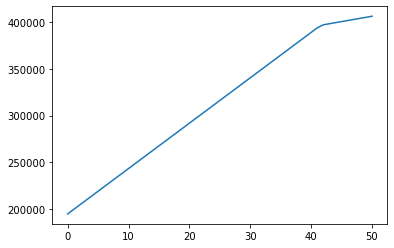

In [21]:
# param analysis for Frame manufacturing coefficient
param_lst = list(range(0,51,))
optval_lst=list()
dvar = mymodel.variables()[0]
for c in param_lst:
    mymodel.Objective().SetCoefficient(dvar,c)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
    print(c,mymodel.Objective().Value())
mymodel.Objective().SetCoefficient(dvar,51)
plt.plot(param_lst,optval_lst)

In [22]:
# I agree with Frandec. As you can see by the graph, if the price is lower than $38, then you will continue to obtain the lowest optimal value as you go down.